In [84]:
import numpy as np
import os
import ast
from tqdm import tqdm
from tqdm.notebook import tqdm

%matplotlib inline
import matplotlib.pyplot as plt

import pickle

In [48]:
working_dir = os.getcwd()
parent_dir = os.path.dirname(working_dir)
data_dir = os.path.join(parent_dir, 'data')


data_hamiltonians_file = os.path.join(data_dir, 'hamiltonians.txt')


fullH_dir = os.path.join(data_dir, 'fullHamiltonians')
fullH_sub_JW_dir = os.path.join(fullH_dir, 'JW')


In [50]:
# Tapered Hamiltonians
with open(data_hamiltonians_file, 'r') as input_file:
    tapered_hamiltonians = ast.literal_eval(input_file.read())
    
tapered_H_size_qubits = {
                            mol_key: {'n_qubits': tapered_hamiltonians[mol_key][1],
                                      'n_terms': len(tapered_hamiltonians[mol_key][2])}
                            for mol_key in tapered_hamiltonians}
del tapered_hamiltonians

In [51]:
for key in tapered_H_size_qubits.keys():
    print(f"{key: <30}     No. terms:  {tapered_H_size_qubits[key]['n_terms']:<7.0f}  No.qubits:  {tapered_H_size_qubits[key]['n_qubits']:<5.0f}")


H2-S1_STO-3G_singlet               No. terms:  6237     No.qubits:  18   
C1-O1_STO-3G_singlet               No. terms:  4409     No.qubits:  16   
H1-Cl1_STO-3G_singlet              No. terms:  4409     No.qubits:  16   
H1-Na1_STO-3G_singlet              No. terms:  4409     No.qubits:  16   
H2-Mg1_STO-3G_singlet              No. terms:  3540     No.qubits:  17   
H1-F1_3-21G_singlet                No. terms:  6852     No.qubits:  18   
H1-Li1_3-21G_singlet               No. terms:  6852     No.qubits:  18   
Be1_STO-3G_singlet                 No. terms:  102      No.qubits:  5    
H1-F1_STO-3G_singlet               No. terms:  558      No.qubits:  8    
H1-Li1_STO-3G_singlet              No. terms:  558      No.qubits:  8    
Ar1_STO-3G_singlet                 No. terms:  1465     No.qubits:  13   
F2_STO-3G_singlet                  No. terms:  2229     No.qubits:  15   
H1-O1_STO-3G_singlet               No. terms:  558      No.qubits:  8    
H2-Be1_STO-3G_singlet              No.

In [30]:
# Pre tapered Hamiltonians
data_pretap_hamiltonians_file = os.path.join(data_dir, 'Hamiltonians_pre_tapering.txt')
with open(data_pretap_hamiltonians_file, 'r') as input_file:
    NON_tapered_hamiltonians = ast.literal_eval(input_file.read())

NON_tapered_H_size_qubits = {
                            mol_key: {'n_qubits': len(list(NON_tapered_hamiltonians[mol_key].keys())[0]),
                                      'n_terms': len(NON_tapered_hamiltonians[mol_key])}
                            for mol_key in NON_tapered_hamiltonians}
del NON_tapered_hamiltonians

In [53]:
for key in NON_tapered_H_size_qubits.keys():
    print(f"{key: <60}     No. terms:  {NON_tapered_H_size_qubits[key]['n_terms']:<7.0f}  No.qubits:  {NON_tapered_H_size_qubits[key]['n_qubits']:<5.0f}")

Ne1_STO-3G_singlet_NeNe                                          No. terms:  156      No.qubits:  10   
O2_STO-3G_triplet_O2O2                                           No. terms:  3075     No.qubits:  20   
Na1_STO-3G_doublet_NaNa                                          No. terms:  3340     No.qubits:  18   
H2-C2_STO-3G_singlet_EthyneEthyne                                No. terms:  6401     No.qubits:  24   
H1-N1-O3_STO-3G_singlet_HNO3HNO3                                 No. terms:  280136   No.qubits:  42   
H1-F1_3-21G_singlet_HF_3-21GHF_3-21G                             No. terms:  13958    No.qubits:  22   
Cl1_STO-3G_doublet_ClCl                                          No. terms:  2092     No.qubits:  18   
H2-C1-O1_STO-3G_singlet_MethanalMethanal                         No. terms:  9257     No.qubits:  24   
P1_STO-3G_quartet_PP                                             No. terms:  3388     No.qubits:  18   
H2-O1_3-21G_singlet_H2O_3-21GH2O_3-21G                          

In [60]:
# molecule names in hamiltonians and hamiltonians before tapering are different
# requires using regular expressions to select correct terms
# done below (code replaces pre-tapered hamiltonian names with naming done by Will!)

import re
pre_tap_hamiltonians_relevent={}
for mol_name_PreT in NON_tapered_H_size_qubits:
    for mol_name in tapered_H_size_qubits.keys():
        if bool(re.match(f'^{mol_name}.*$', mol_name_PreT)): # NO wildcard at front. Wildcard at end
            pre_tap_hamiltonians_relevent[mol_name] = NON_tapered_H_size_qubits[mol_name_PreT]

In [61]:
pre_tap_hamiltonians_relevent

{'Ne1_STO-3G_singlet': {'n_qubits': 10, 'n_terms': 156},
 'H1-F1_3-21G_singlet': {'n_qubits': 22, 'n_terms': 13958},
 'H1-F1_STO-3G_singlet': {'n_qubits': 12, 'n_terms': 631},
 'Mg1_STO-3G_singlet': {'n_qubits': 18, 'n_terms': 3388},
 'H3_3-21G_singlet_1+': {'n_qubits': 12, 'n_terms': 1501},
 'H2-S1_STO-3G_singlet': {'n_qubits': 22, 'n_terms': 6246},
 'O2_STO-3G_singlet': {'n_qubits': 20, 'n_terms': 2255},
 'H1-Li1_STO-3G_singlet': {'n_qubits': 12, 'n_terms': 631},
 'H2-Be1_STO-3G_singlet': {'n_qubits': 14, 'n_terms': 666},
 'H1-Li1_3-21G_singlet': {'n_qubits': 22, 'n_terms': 8758},
 'H1-Na1_STO-3G_singlet': {'n_qubits': 20, 'n_terms': 5851},
 'H4-N1_STO-3G_singlet_1+': {'n_qubits': 18, 'n_terms': 6892},
 'H2-Mg1_STO-3G_singlet': {'n_qubits': 22, 'n_terms': 4582},
 'H1-He1_STO-3G_singlet': {'n_qubits': 4, 'n_terms': 27},
 'C1-O1_STO-3G_singlet': {'n_qubits': 20, 'n_terms': 5475},
 'H3-N1_STO-3G_singlet': {'n_qubits': 16, 'n_terms': 4293},
 'H3_STO-3G_singlet_1+': {'n_qubits': 6, 'n_ter

In [62]:
sorted(list(pre_tap_hamiltonians_relevent.keys())) == sorted(list(tapered_H_size_qubits.keys()))

True

In [63]:
for key in tapered_H_size_qubits.keys():
    print(f"{key: <25}     No. terms original:  {pre_tap_hamiltonians_relevent[key]['n_terms']:<6.0f}   No. terms tapering:  {tapered_H_size_qubits[key]['n_terms']:<5.0f}")

H2-S1_STO-3G_singlet          No. terms original:  6246     No. terms tapering:  6237 
C1-O1_STO-3G_singlet          No. terms original:  5475     No. terms tapering:  4409 
H1-Cl1_STO-3G_singlet         No. terms original:  8159     No. terms tapering:  4409 
H1-Na1_STO-3G_singlet         No. terms original:  5851     No. terms tapering:  4409 
H2-Mg1_STO-3G_singlet         No. terms original:  4582     No. terms tapering:  3540 
H1-F1_3-21G_singlet           No. terms original:  13958    No. terms tapering:  6852 
H1-Li1_3-21G_singlet          No. terms original:  8758     No. terms tapering:  6852 
Be1_STO-3G_singlet            No. terms original:  156      No. terms tapering:  102  
H1-F1_STO-3G_singlet          No. terms original:  631      No. terms tapering:  558  
H1-Li1_STO-3G_singlet         No. terms original:  631      No. terms tapering:  558  
Ar1_STO-3G_singlet            No. terms original:  2092     No. terms tapering:  1465 
F2_STO-3G_singlet             No. terms ori

# Import Myriad Results

In [81]:
## import LCU results
results_dir = os.path.join(working_dir, 'SeqRot_LCU_script_A_results')

myriad_LCU_results = {}
for filename in os.listdir(results_dir):
    if (filename.endswith('.pickle') and filename.startswith('LCU_CS_VQE_exp')):
        file_path = os.path.join(results_dir, filename) 
        mol_name = filename[40:-8]
        with open(file_path,'rb') as infile:
            data = pickle.load(infile)

        myriad_LCU_results[mol_name] = data

In [75]:
## import SeqRot results
results_dir = os.path.join(working_dir, 'SeqRot_LCU_script_A_results')

myriad_SeqRot_results = {}
for filename in os.listdir(results_dir):
    if (filename.endswith('.pickle') and filename.startswith('SeqRot_CS_VQE_exp')):
        file_path = os.path.join(results_dir, filename) 
        mol_name = filename[43:-8]
        with open(file_path,'rb') as infile:
            data = pickle.load(infile)
        myriad_SeqRot_results[mol_name] = data

In [82]:
sorted(list(myriad_SeqRot_results.keys())) == sorted(list(myriad_LCU_results.keys()))

True

In [94]:
myriad_SeqRot_results['H2-Be1_STO-3G_singlet'][1]

{'E': -19.052461923533848,
 'H': {'I': -18.449311216657115,
  'Z': -0.597382175022161,
  'X': 0.08321846052224319}}

# Perform Unitary Partitioning on results

In [91]:
from quchem.Unitary_Partitioning.Graph import Clique_cover_Hamiltonian
import quchem.Misc_functions.conversion_scripts as conv_scr 
from copy import deepcopy

In [96]:
### find anti-commuting sets
unitary_paritioning_LCU={}
unitary_paritioning_SeqRot={}

commutativity_flag = 'AC' ## <- defines relationship between sets!!!
plot_graph = False
Graph_colouring_strategy='largest_first'


for mol_key in tqdm(list(myriad_LCU_results.keys())):
    
    exp_LCU_result = myriad_LCU_results[mol_key]
    exp_SeqRot_result = myriad_SeqRot_results[mol_key]
    
    
    anti_commuting_sets_different_H_SeqRot_sizes={}
    anti_commuting_sets_different_H_LCU_sizes={}
    for ind_key in myriad_SeqRot_results[mol_key]:
        
        if isinstance(ind_key, str):
            continue
        
        if ind_key==0:
            # only non-contextual problem
            anti_commuting_sets_different_H_SeqRot_sizes[ind_key]={}
            anti_commuting_sets_different_H_LCU_sizes[ind_key]={}
        else:

            ### LCU
            H_LCU_dict = myriad_LCU_results[mol_key][ind_key]['H']
            H_LCU= conv_scr.Get_Openfermion_Hamiltonian(H_LCU_dict)

            n_qubits = len(list(H_LCU_dict.keys())[0])
            anti_commuting_sets_LCU = Clique_cover_Hamiltonian(list(H_LCU), 
                                                         n_qubits, 
                                                         commutativity_flag, 
                                                         Graph_colouring_strategy)
            
            anti_commuting_sets_different_H_LCU_sizes[ind_key]= anti_commuting_sets_LCU
            
            ### SeqRot
            H_SeqRot_dict = myriad_SeqRot_results[mol_key][ind_key]['H']
            H_SeqRot= conv_scr.Get_Openfermion_Hamiltonian(H_SeqRot_dict)
            anti_commuting_sets_SeqRot = Clique_cover_Hamiltonian(H_SeqRot, 
                                             n_qubits, 
                                             commutativity_flag, 
                                             Graph_colouring_strategy)

            anti_commuting_sets_different_H_SeqRot_sizes[ind_key]= anti_commuting_sets_SeqRot
    
    unitary_paritioning_LCU[mol_key]= deepcopy(anti_commuting_sets_different_H_LCU_sizes)
    unitary_paritioning_SeqRot[mol_key]= deepcopy(anti_commuting_sets_different_H_SeqRot_sizes)
    del anti_commuting_sets_different_H_LCU_sizes
    del anti_commuting_sets_different_H_SeqRot_sizes

In [99]:
myriad_LCU_results[mol_key][0]

{'E': -77.76838532328783, 'H': {'': -77.76838532328783}}

In [134]:
def plot_CS_VQE_vs_UP(mol_dict, mol_name, dpi=100):
    
    ## get total number of terms for each reduction
    UP_total_terms = []
    CS_VQE_terms =[]
    for CS_VQE_Ham, UP_ham in mol_dict:
        UP_total_terms.append(len(UP_ham))
        CS_VQE_terms.append(len(CS_VQE_Ham))
    
    plt.figure(dpi=dpi)
    plt.plot(CS_VQE_terms, UP_total_terms, marker='o', color='b');
    plt.xlabel('number of CS VQE terms')
    plt.ylabel('number of UP terms')
    plt.title(mol_name)
    
    plt.show()
    


# Plot of CS_VQE vs CS_VQE + unitary partitioning

- Below are plots of the number of terms in each **CS VQE molecular hamiltion vs number of terms in the SAME hamiltonian with unitary partitioning applied**.

- From left to right on the x axis the quantum resource has been expanded (more qubits used), till the rightmost point where no simplification has been made (aka Hamiltonian hasn't had terms removed)

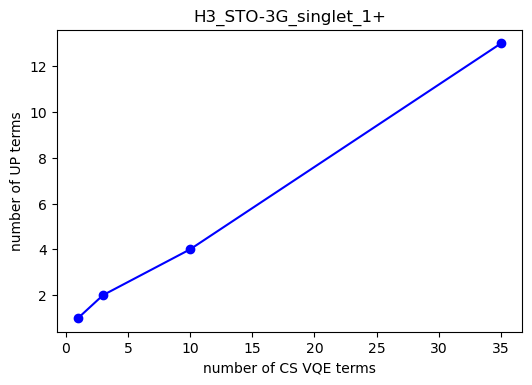

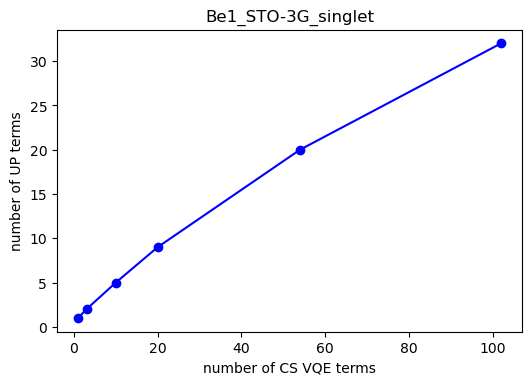

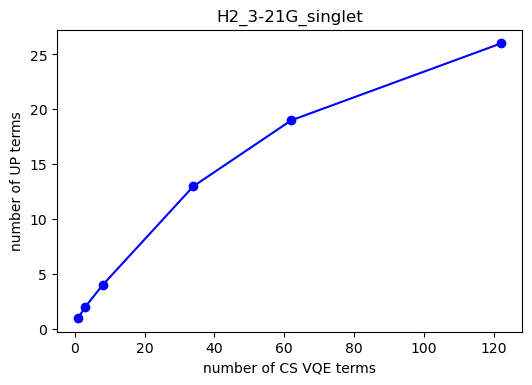

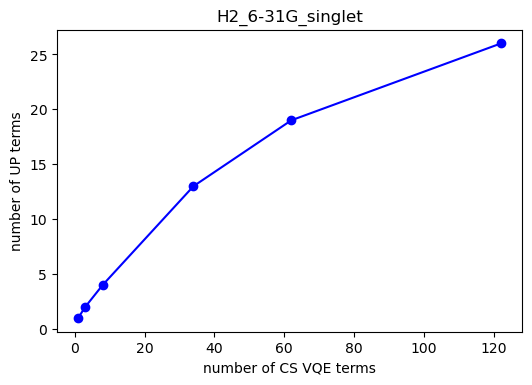

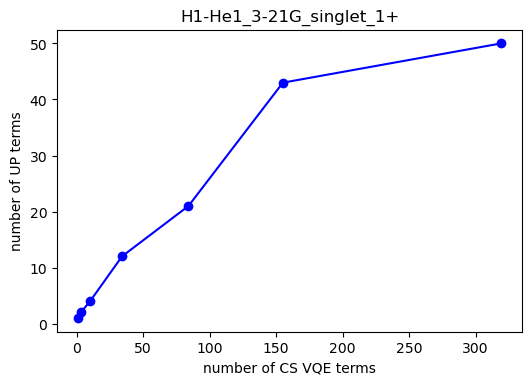

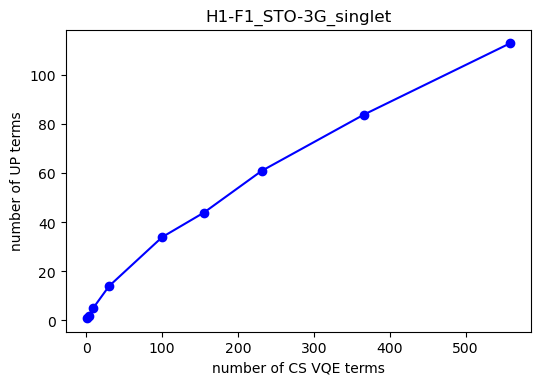

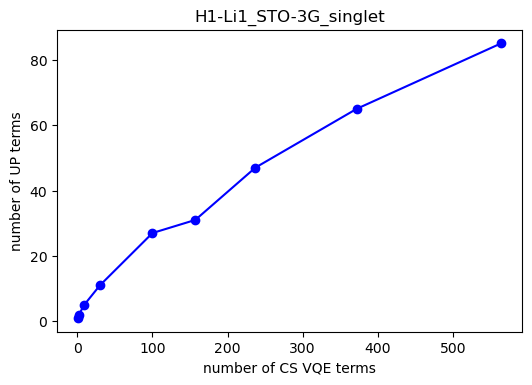

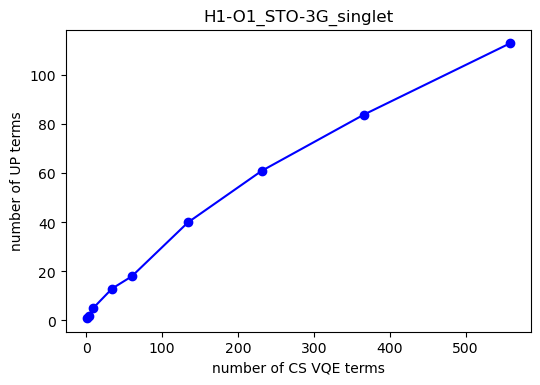

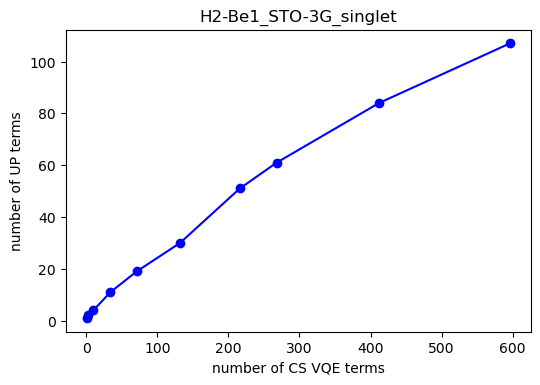

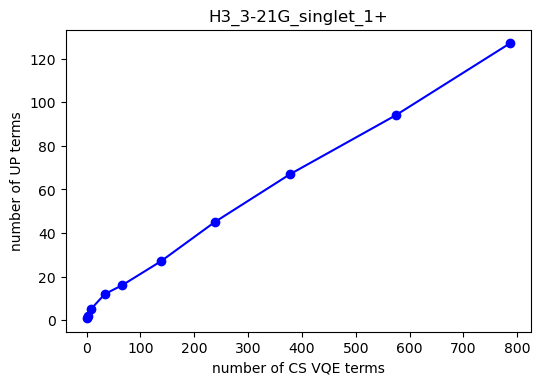

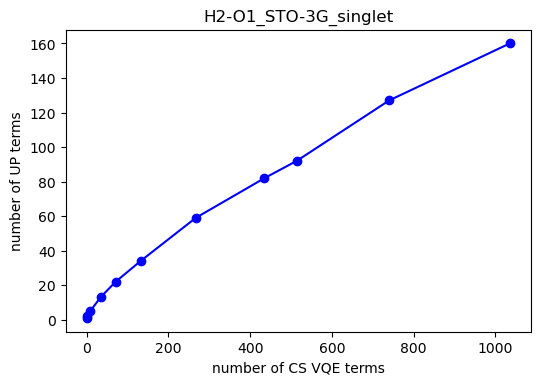

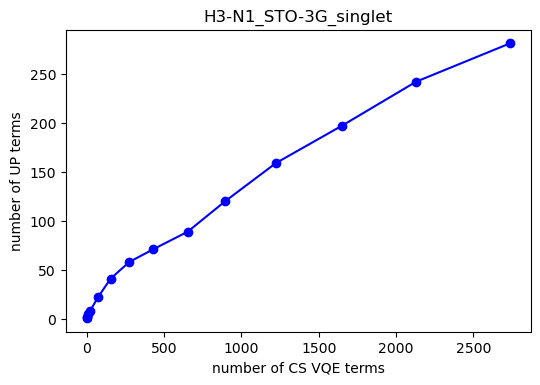

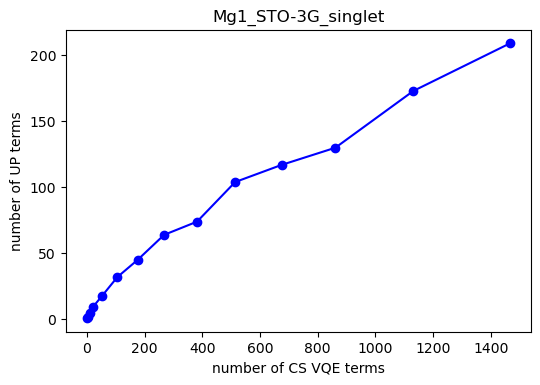

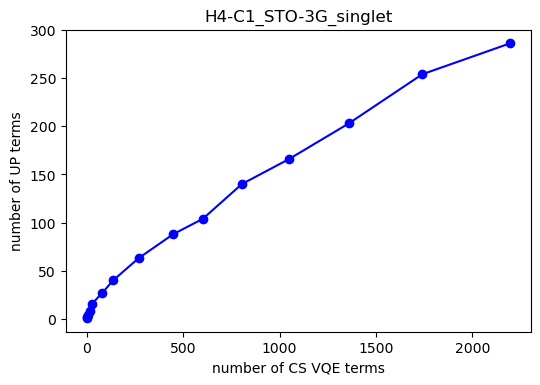

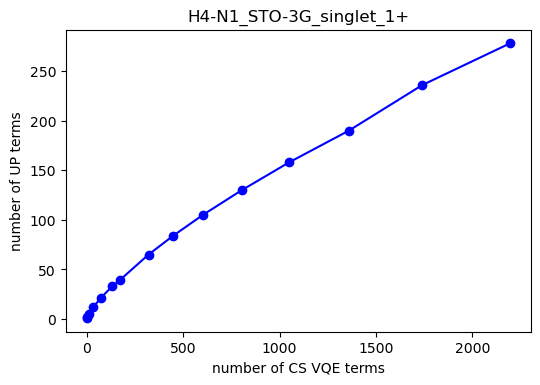

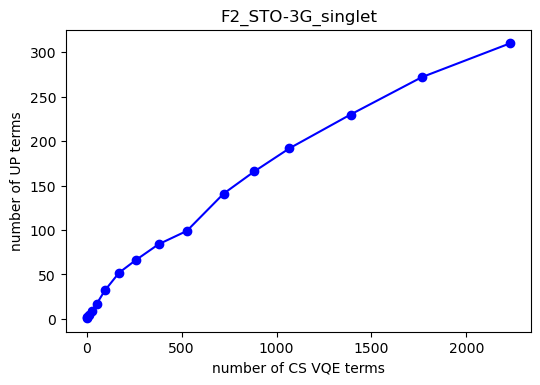

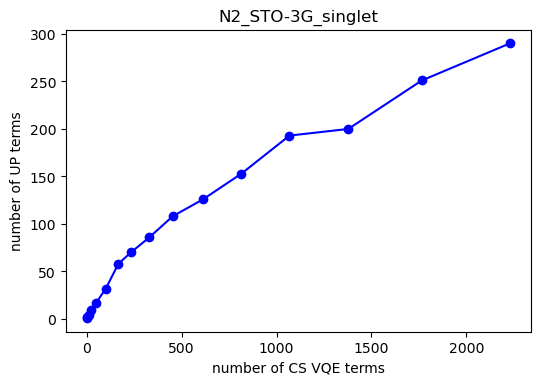

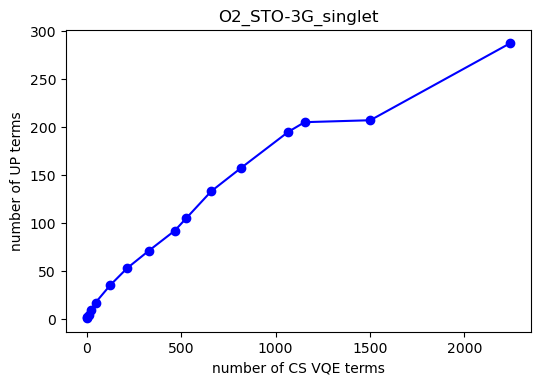

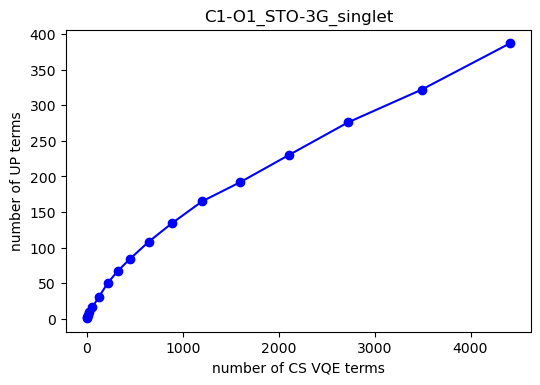

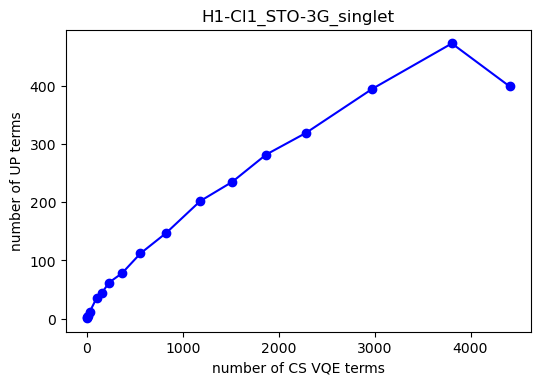

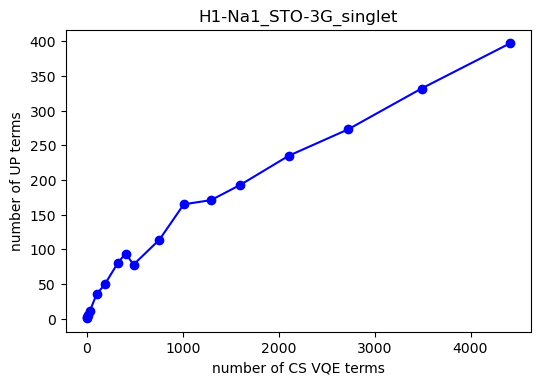

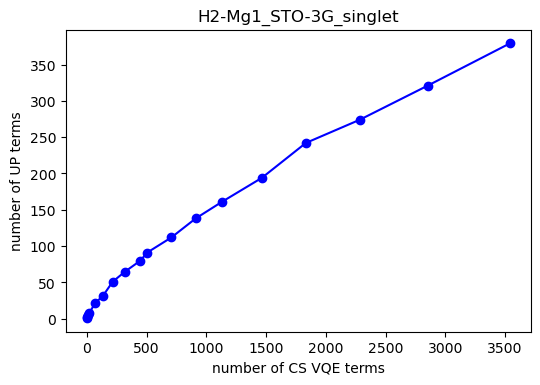

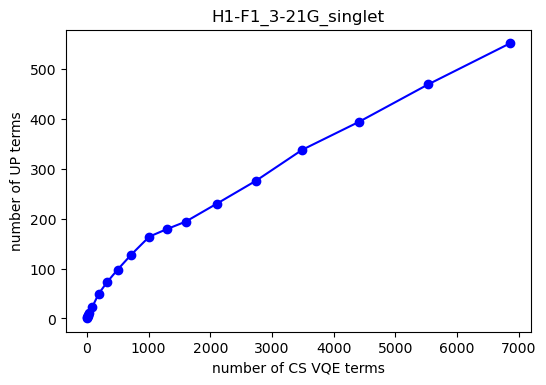

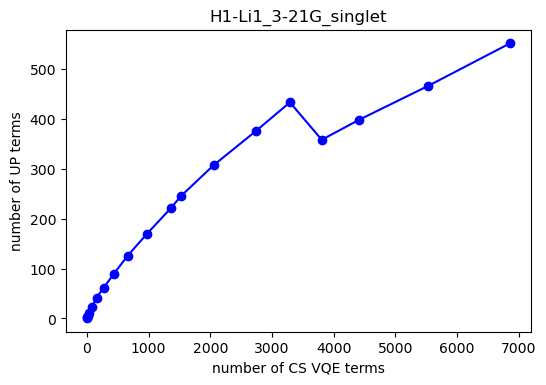

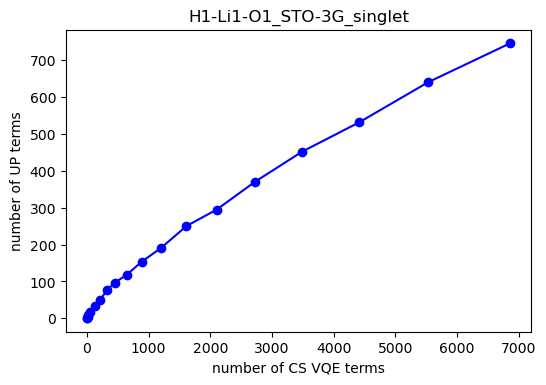

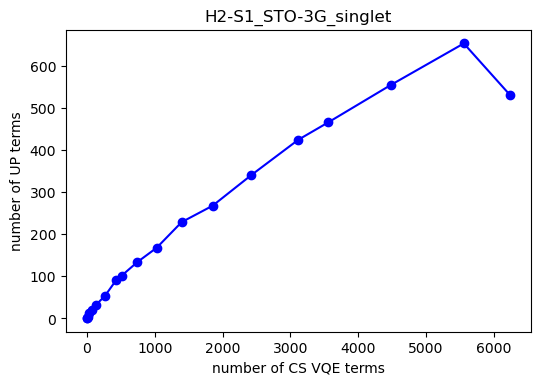

In [135]:
for molecule in loaded_dict:
    plot_CS_VQE_vs_UP(loaded_dict[molecule], molecule)

In [136]:
def plot_n_qubits_VS_n_terms(mol_dict, mol_name, dpi=200):
    # https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
    
    ## get total number of terms for each reduction
    UP_total_terms = []
    CS_VQE_terms =[]
    for CS_VQE_Ham, UP_ham in mol_dict:
        UP_total_terms.append(len(UP_ham))
        CS_VQE_terms.append(len(CS_VQE_Ham))
    
   
    
    n_qubits = np.array([i for i in range(len(mol_dict))]) # labels

    width = 0.5  # the width of the bars

    fig, ax = plt.subplots(dpi=dpi)
    rects1 = ax.bar(n_qubits - width/2, CS_VQE_terms, width, label='CS_VQE')
    rects2 = ax.bar(n_qubits + width/2, UP_total_terms, width, label='UP')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Number of terms')
    ax.set_xlabel('Number of qubits')
    
    ax.set_title(mol_name)
    ax.set_xticks(n_qubits)
    ax.set_xticklabels(n_qubits)
    ax.legend()


#     def autolabel(rects):
#         """Attach a text label above each bar in *rects*, displaying its height."""
#         for rect in rects:
#             height = rect.get_height()
#             ax.annotate('{}'.format(height),
#                         xy=(rect.get_x() + rect.get_width() / 2, height),
#                         xytext=(0, 3),  # 3 points vertical offset
#                         textcoords="offset points",
#                         ha='center', va='bottom')


#     autolabel(rects1)
#     autolabel(rects2)

    fig.tight_layout()

    plt.show()

# Plot of CS_VQE and CS_VQE + unitary partitioning against quantum resource

- Below are plots of the number of terms in each **CS VQE molecular hamiltion vs number of qubits AND the same Hamiltonian with unitary partitioning applied vs number of qubits**


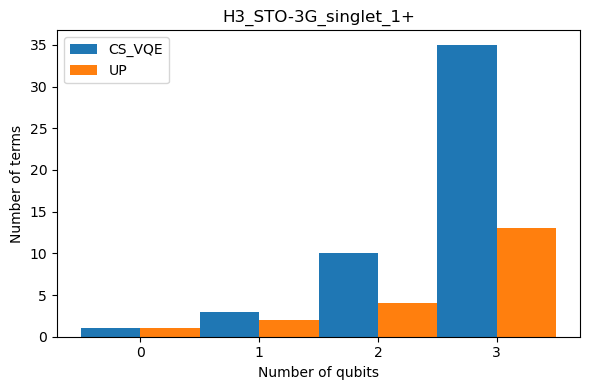

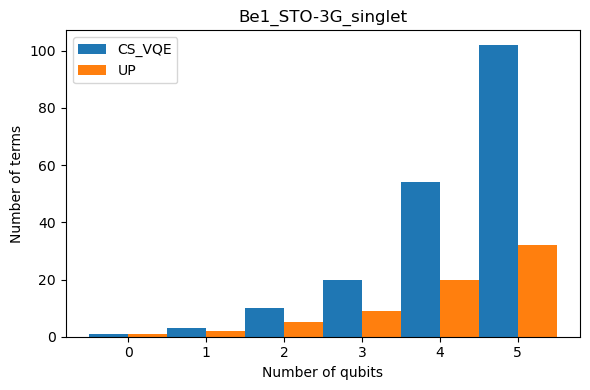

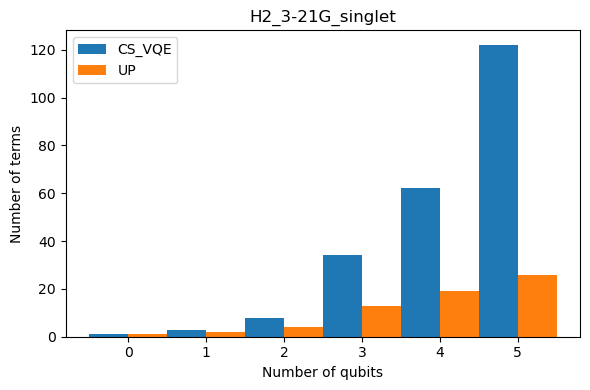

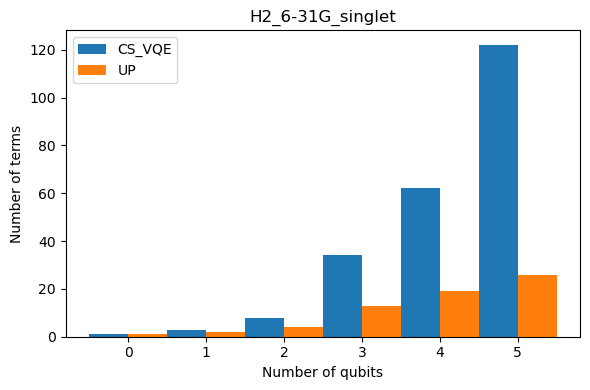

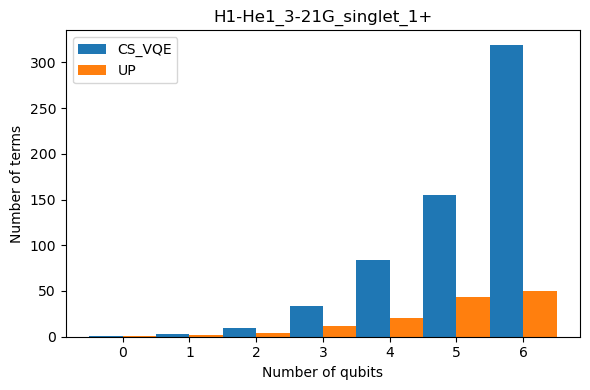

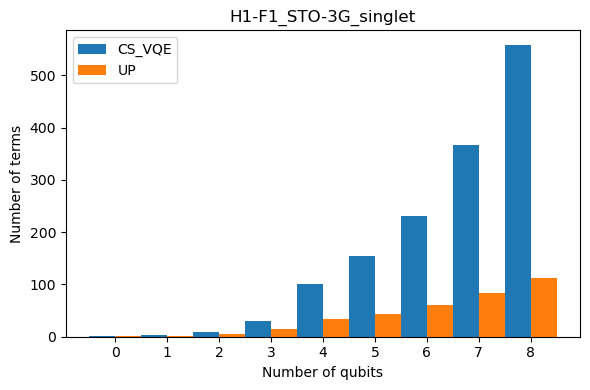

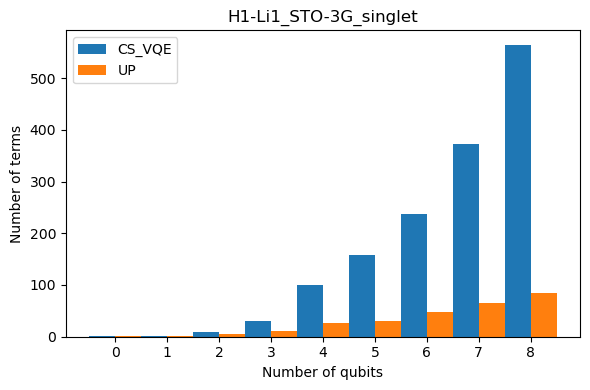

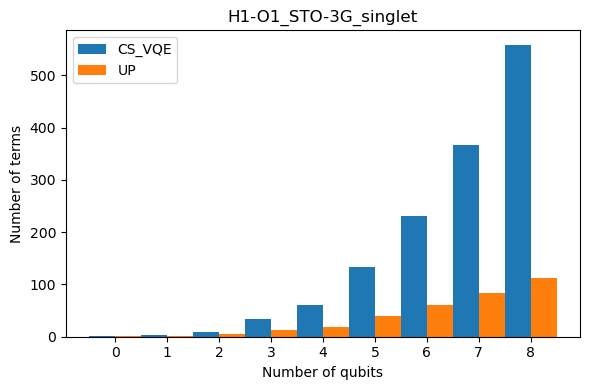

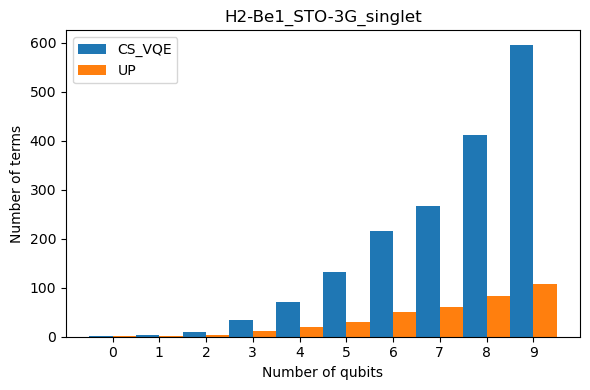

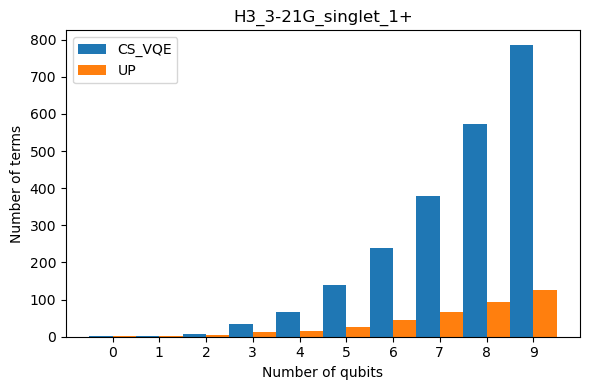

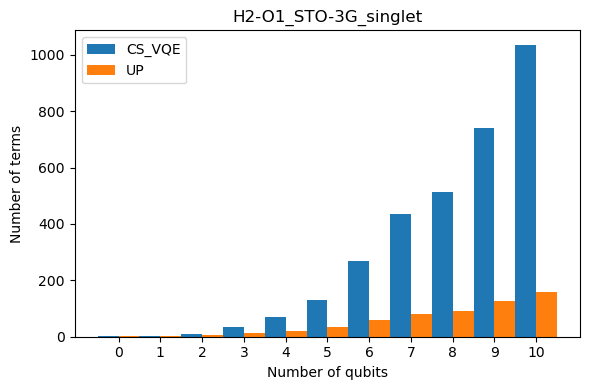

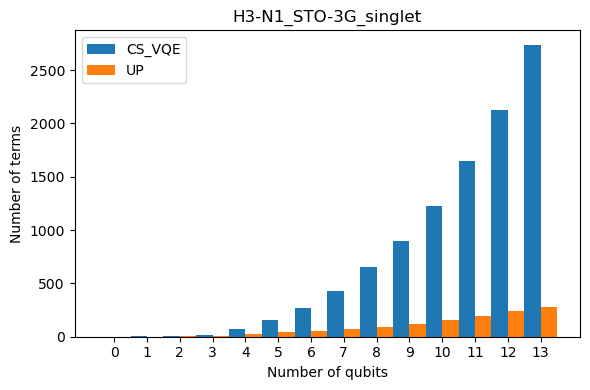

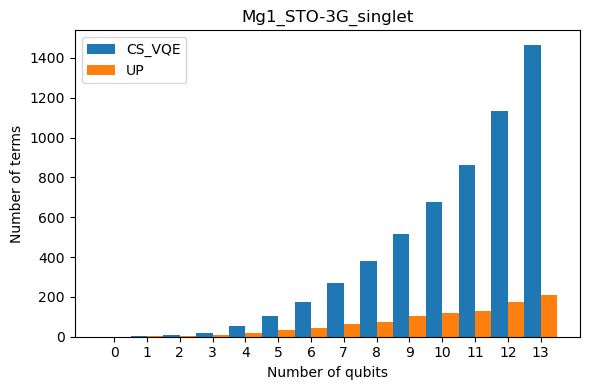

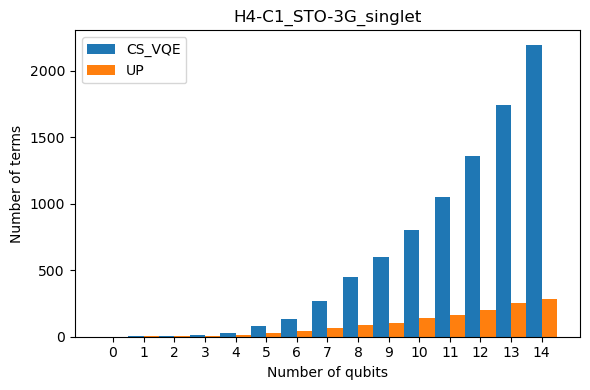

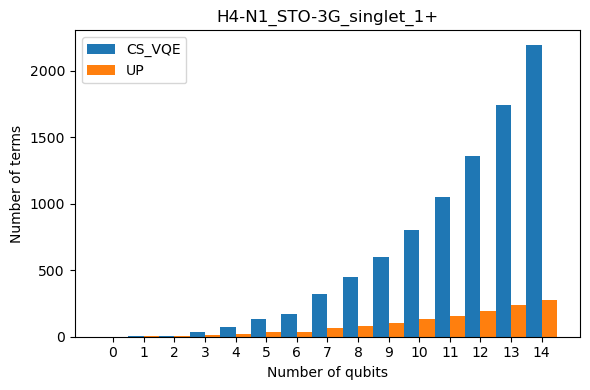

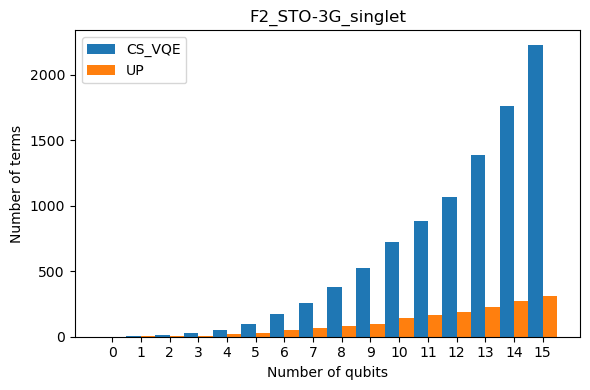

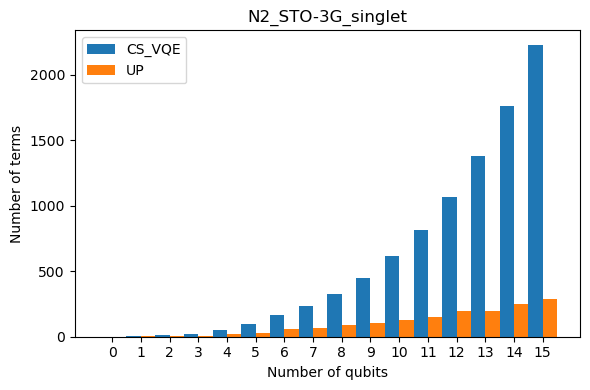

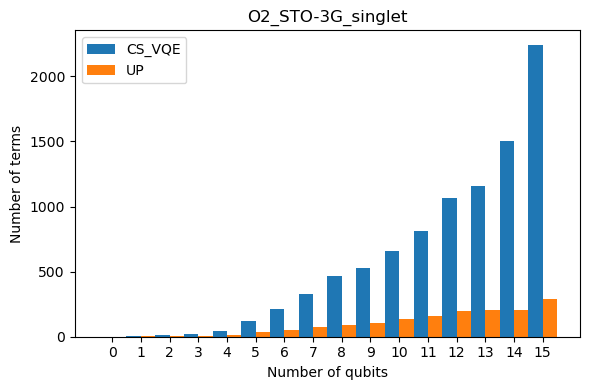

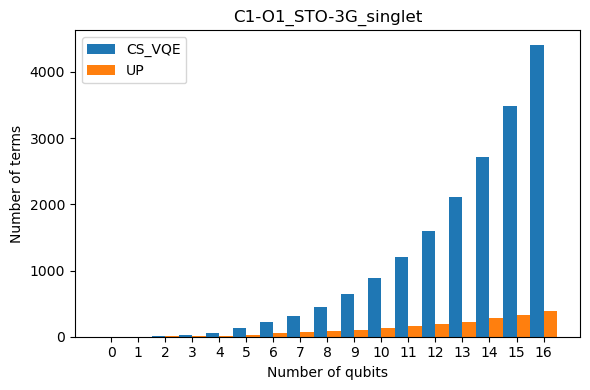

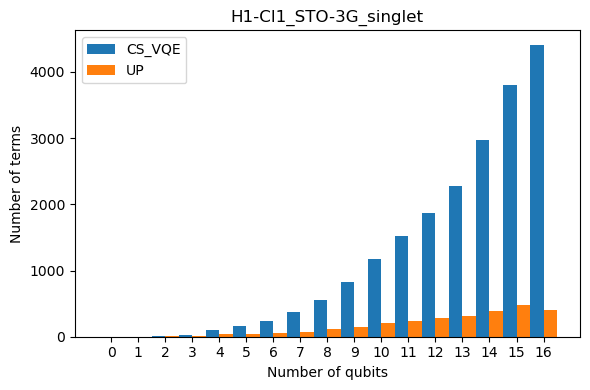

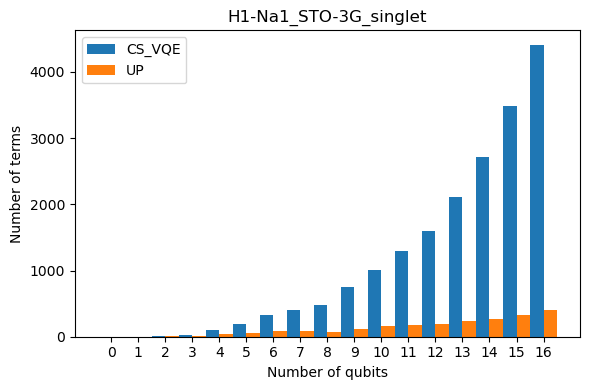

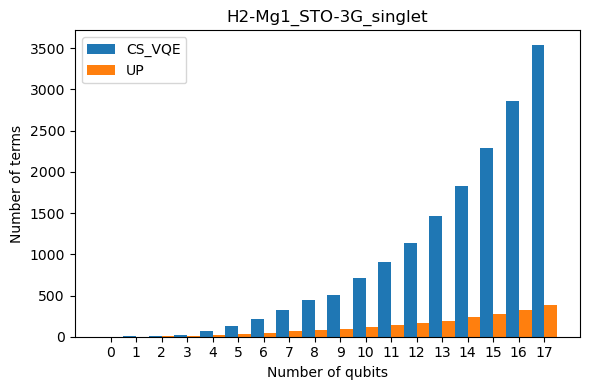

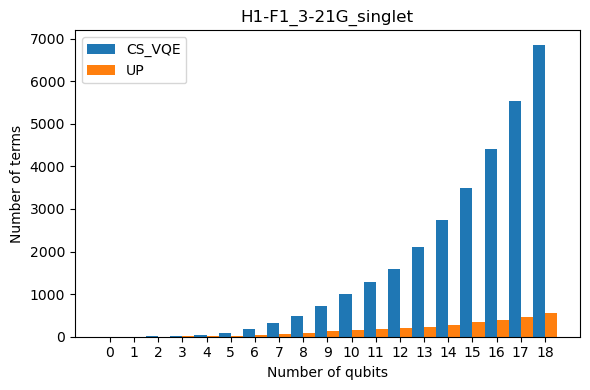

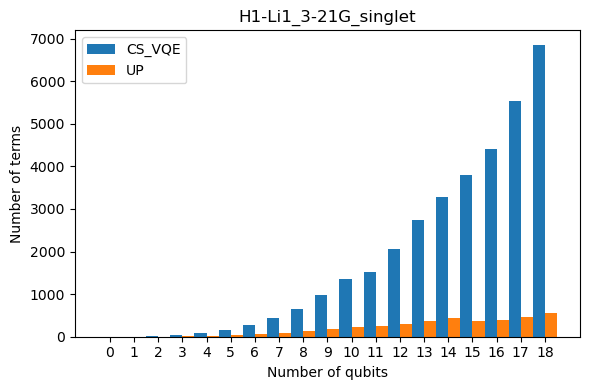

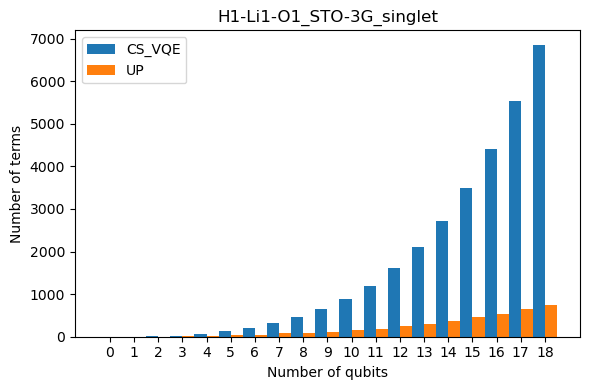

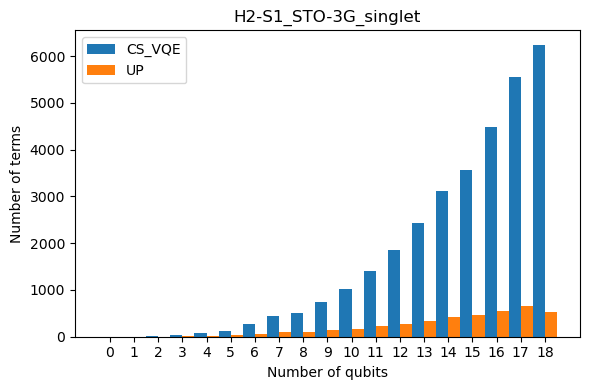

In [137]:
for molecule in loaded_dict:
    plot_n_qubits_VS_n_terms(loaded_dict[molecule], molecule, dpi=100)

# Chemical accuracy check

In [138]:
### paper results
csvqe_results_data = os.path.join(data_dir, 'csvqe_results.txt')
with open(csvqe_results_data, 'r') as input_file:
    csvqe_results = ast.literal_eval(input_file.read())


In [140]:
## import LCU results
file_name = 'E_LCU_all_EXP__2021Apr07-183052495948.pickle'



input_file = os.path.join(Pickle_data_dir, file_name) 
with open(input_file, 'rb') as infile:
    E_LCU_dict = pickle.load(infile)
    

In [156]:
def plot_n_terms_and_error(mol_dict, paper_results_dict, Nterms_tapered_H_dict, Nterms_FULL_H_dict,
                           mol_name, LCU_energies_dict, dpi=200):
    # https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
    
    # mol_dict = list of lists of anticommuting sets and standard contextual H
    # paper_results_dict =  CS-VQE paper results dict
    # Nterms_H_dict = dict of number of terms in each molecular hamiltonian without any method applied!
    
    ## get total number of terms for each reduction
    UP_total_terms = []
    CS_VQE_terms =[]
    for CS_VQE_Ham, UP_ham in mol_dict:
        UP_total_terms.append(len(UP_ham))
        CS_VQE_terms.append(len(CS_VQE_Ham))
    
    
    n_qubits = np.array([i for i in range(len(mol_dict))]) # labels

    width = 0.5  # the width of the bars

    fig, ax = plt.subplots(dpi=dpi)
    rects1 = ax.bar(n_qubits - width/2, CS_VQE_terms, width, label='CS_VQE')
    rects2 = ax.bar(n_qubits + width/2, UP_total_terms, width, label='UP')

    ax.set_ylabel('Number of terms')
    ax.set_xlabel('Number of qubits')
    

    tapered_N_terms = Nterms_tapered_H_dict[mol_name]
    rects3 = ax.bar(n_qubits[-1] + width*1.5, tapered_N_terms, width, label='tapered H')
    
    original_N_terms = Nterms_FULL_H_dict[mol_name]
    rects4 = ax.bar(n_qubits[-1] + width*2.5, original_N_terms, width, label='original H')

    ####  second y axis!
    true_gs_energy = paper_results_dict[mol_name][0]
    CS_VQE_error = paper_results_dict[mol_name][2]
    LCU_errors = LCU_energies_dict[mol_name]['Error_list']
    
    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(n_qubits,CS_VQE_error,color="blue",marker="o", label='CS_VQE error')
    ax2.plot(n_qubits,LCU_errors,color="red",marker="x", linestyle='--', label='CS_VQE + LCU_UP error')
    ax2.set_ylabel("Energy Error",color="black",fontsize=14)

    ax2.axhline(y=1.6e-3, color='black', linestyle='-', label='chemical accuracy')
    
    ax.set_title(mol_name)
    ax.set_xticks(n_qubits)
    ax.set_xticklabels(n_qubits)
    ax.legend()
    ax2.legend(loc='center left')
    fig.tight_layout()

    plt.show()
    
        # save the plot as a file
#     fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#                 format='jpeg',
#                 dpi=100,
#                 bbox_inches='tight')

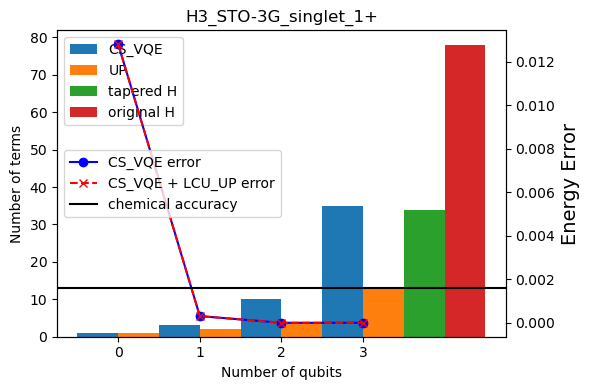

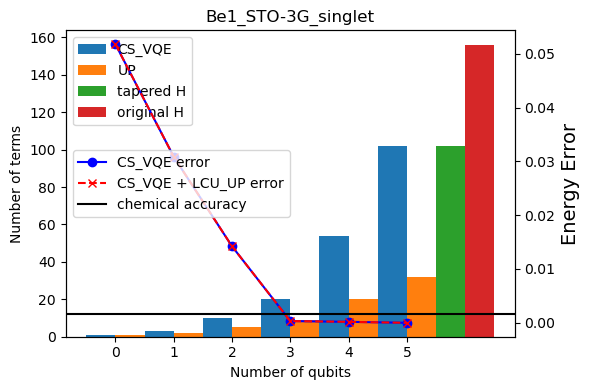

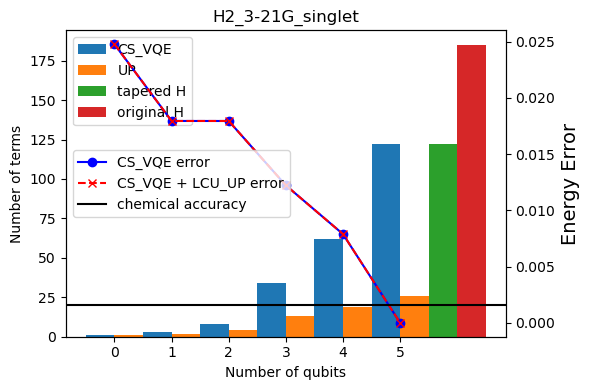

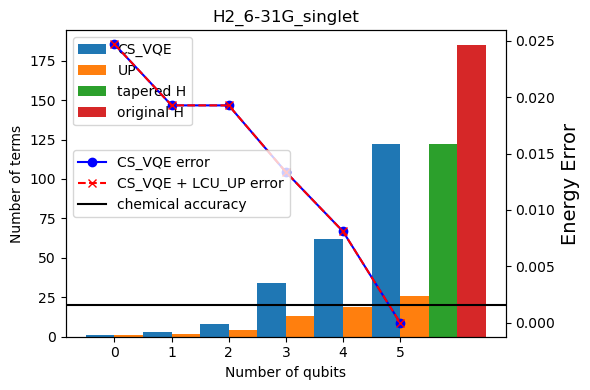

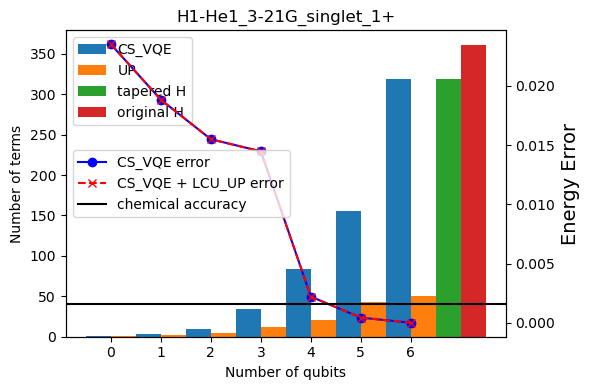

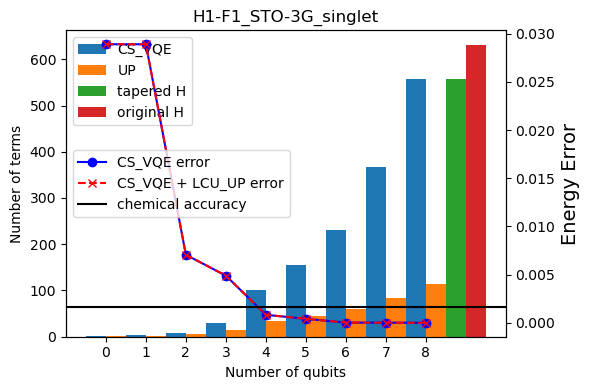

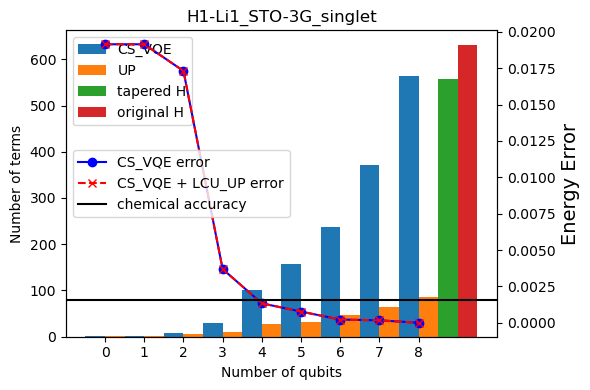

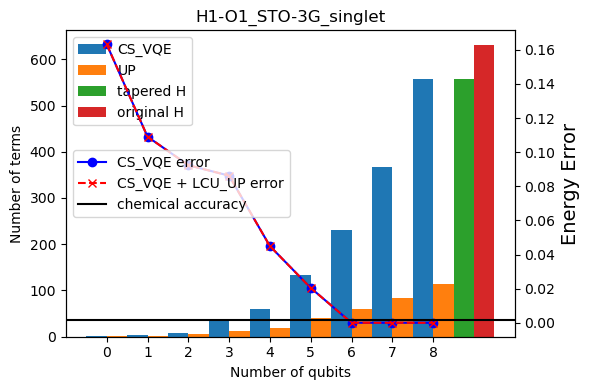

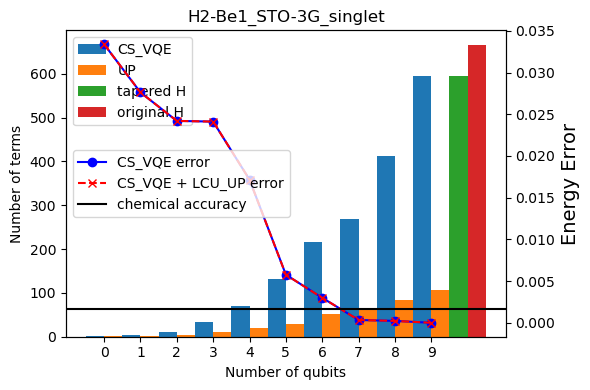

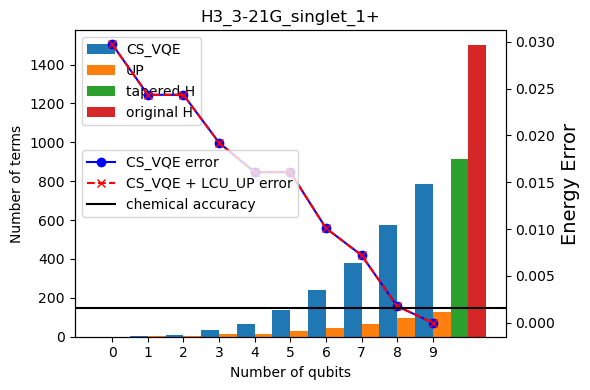

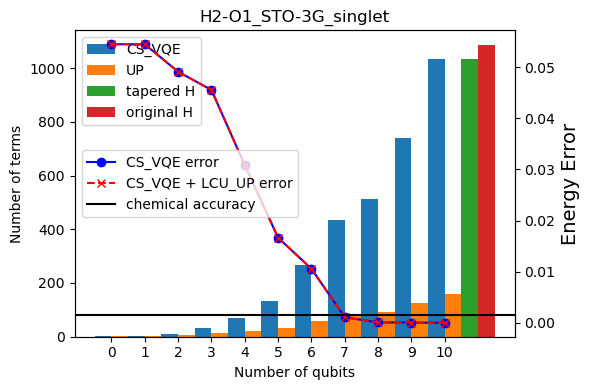

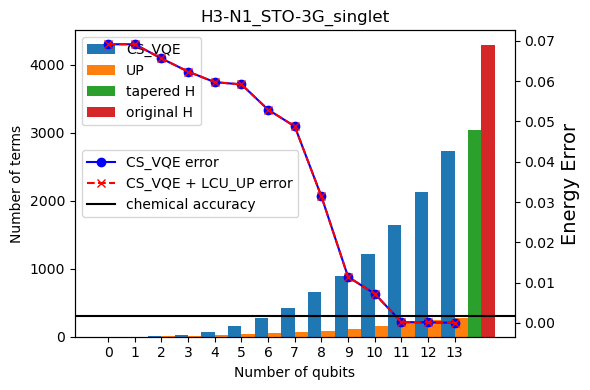

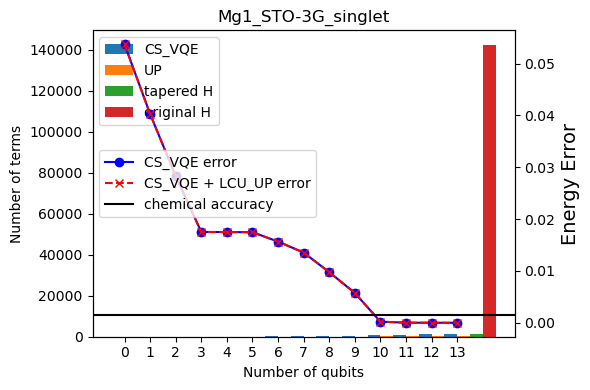

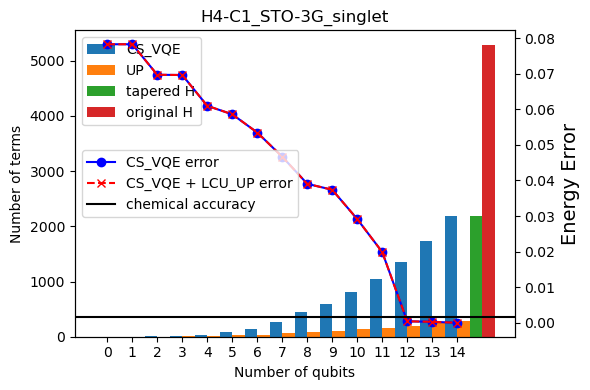

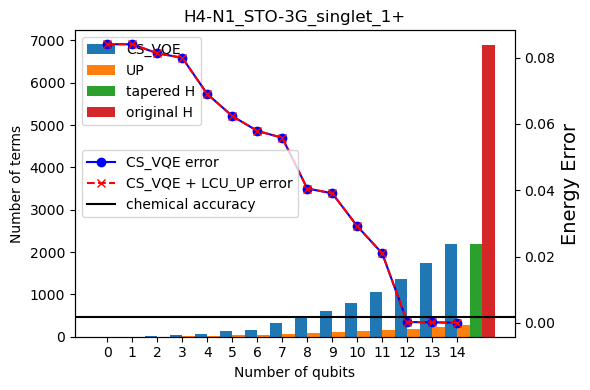

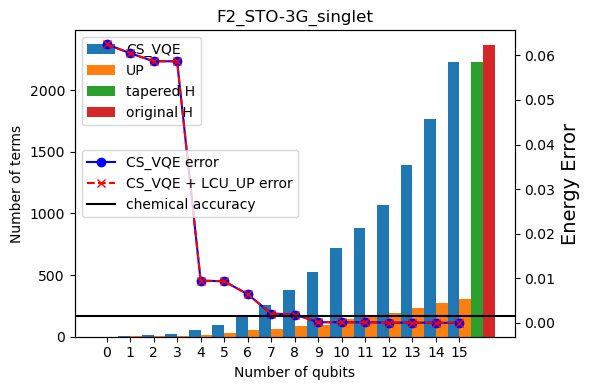

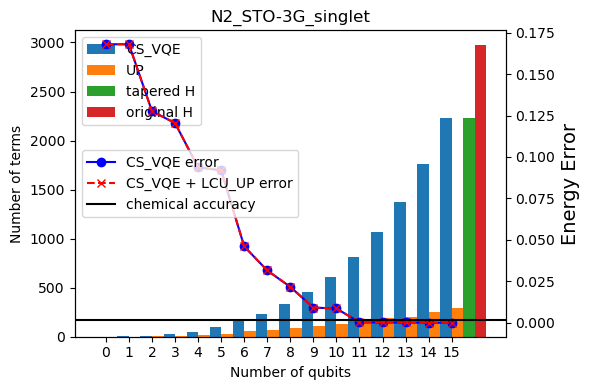

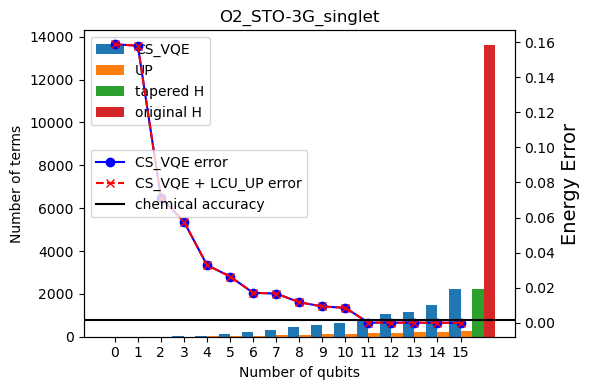

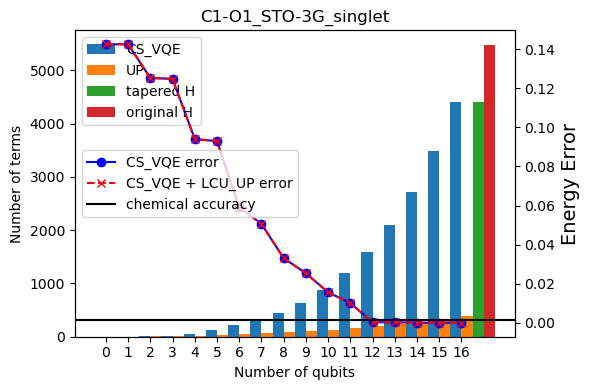

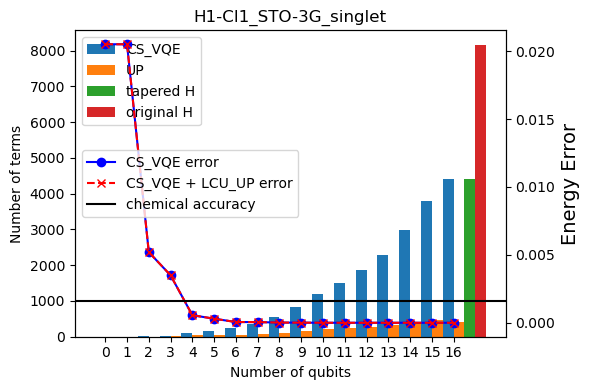

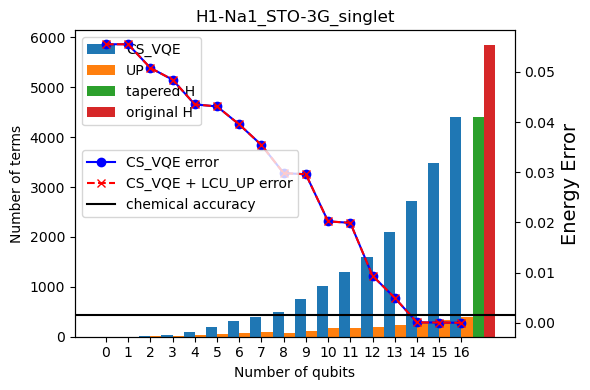

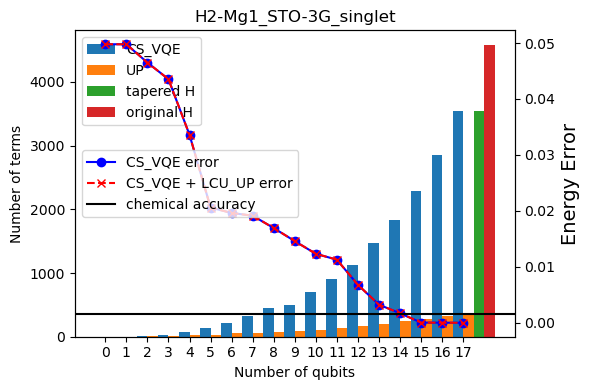

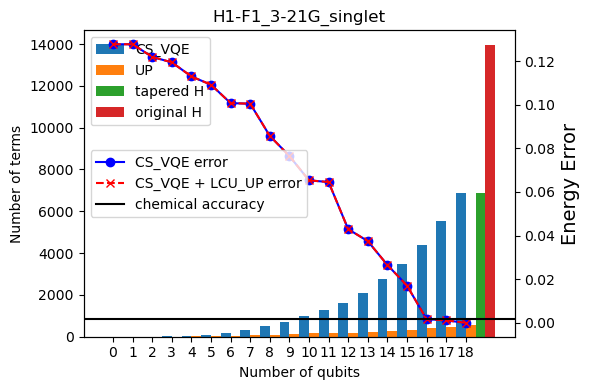

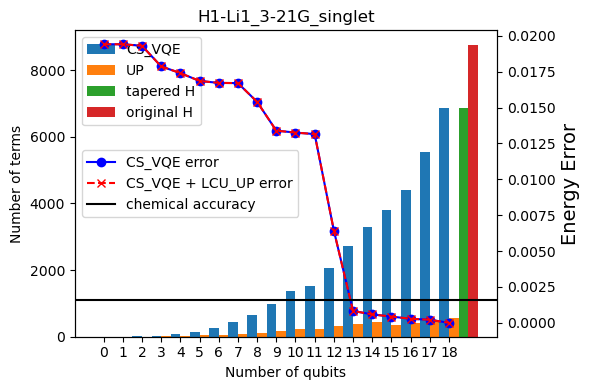

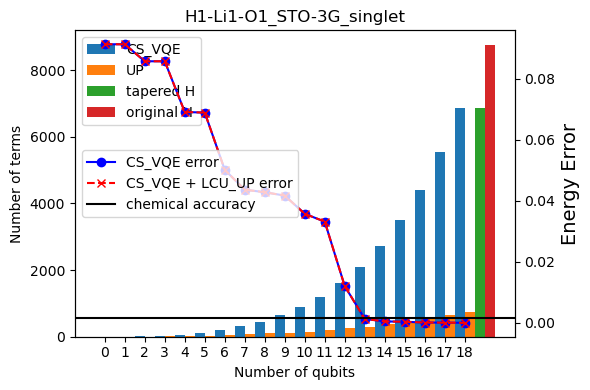

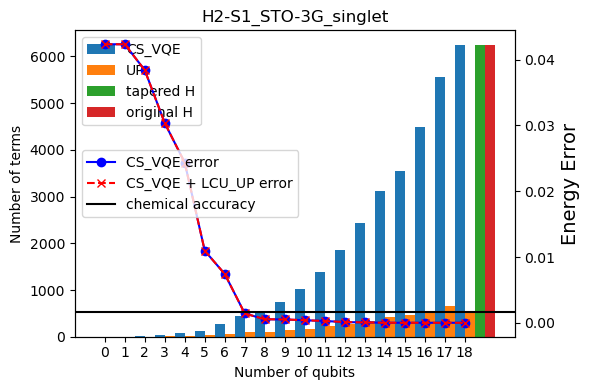

In [157]:
for molecule in loaded_dict:
    plot_n_terms_and_error(loaded_dict[molecule], csvqe_results, tapered_H_size, full_H_size,
                           molecule, E_LCU_dict, dpi=100)